In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
labels = [1900 + x for x in range(101)]
plt.close()
plt.clf()
PIP_losses = np.load('PIP_loss_matrix.npy')
#PIP_losses = np.log(1 + PIP_losses)

dimensions = range(PIP_losses.shape[0])
assert(len(dimensions) == len(labels))
ixgrid = np.ix_(dimensions, dimensions)
real_dimension = labels
plt.figure()
df = pd.DataFrame(PIP_losses[ixgrid], index=real_dimension, columns=real_dimension)
ax = sns.heatmap(df, cmap="BuPu", vmin=600)#, xticklabels=len(dimensions)-1, yticklabels=len(dimensions)-1)
fig = ax.get_figure()
fig.savefig("PIP_loss.pdf")

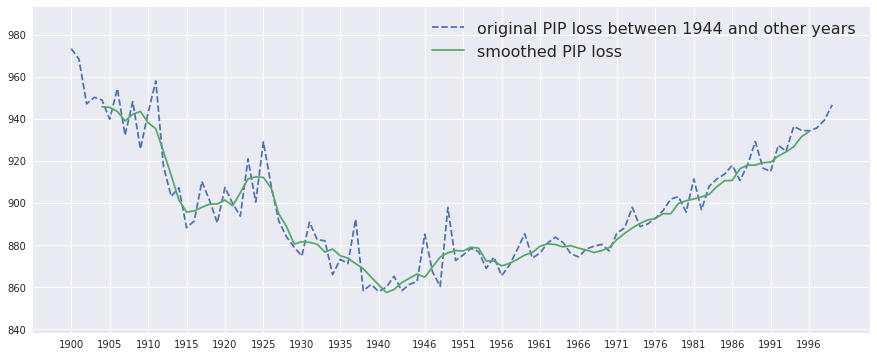

In [9]:
plt.close()
plt.clf()
year = 1944
tmp_labels = list(labels)
lines = PIP_losses[year - labels[0]].tolist()
lines.pop(year - labels[0])
tmp_labels.pop(year - labels[0])
tmp_dimensions = list(dimensions)
tmp_dimensions.pop(year - labels[0])
width = 5
if width == 1:
    kernel = np.array([1])
elif width == 3:
    kernel = (1.0/35) * np.array([-3, 12, 17, 12, -3])
elif width == 4:
    kernel = (1.0/21) * np.array([-2, 3, 6, 7, 6, 3, -2])
elif width == 5:
    kernel = (1.0/231) * np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21])
ma = np.convolve(lines, kernel, mode='valid')

ymin = sorted(lines)[1]
ymax = sorted(lines)[-1]
plt.figure(num=None, figsize=(15, 6), facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.plot(lines, '--', label='original PIP loss between 1944 and other years')
ax.plot(tmp_dimensions[width-1:-width+1], ma, label='smoothed PIP loss')
per = 5
plt.xticks([tmp_dimensions[per*i] for i in range(len(tmp_dimensions) / per)], [tmp_labels[per*i] for i in range(len(tmp_dimensions) / per)])
plt.ylim((ymin - 20, ymax + 20))
ax.legend(loc='best', prop={'size': 16})
plt.savefig("PIP_loss_{}.pdf".format(year))
